--- Running Financial Forecasting Pipeline with NEW Dummy Data ---
This run uses DIFFERENT synthetically generated data compared to the previous version.
For your project, replace dummy data generation with your actual CSV file loading.

--- STEP 1: Data Acquisition & Preparation ---
Generated NEW dummy stock data (downtrend, higher volatility).
Stock data preprocessing complete.
Generated NEW dummy credit data (more features, balanced outcomes).
Encoded 'Loan_Status' categories: ['Approved' 'Rejected']
Credit data preprocessing complete.
Generated NEW dummy revenue/expense data (strong seasonality, faster growth).
Revenue/Expense data preprocessing complete.

--- STEP 6: Exploratory Data Analysis (EDA) ---

--- Stock Data EDA ---

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 570 entries, 2021-07-01 to 2023-01-21
Freq: D
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Close           

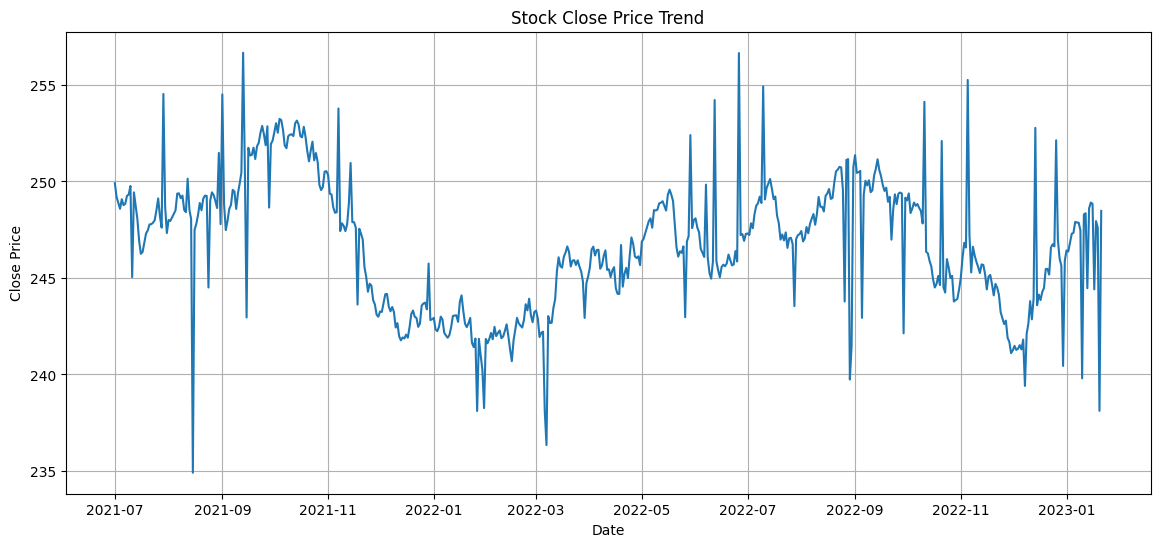

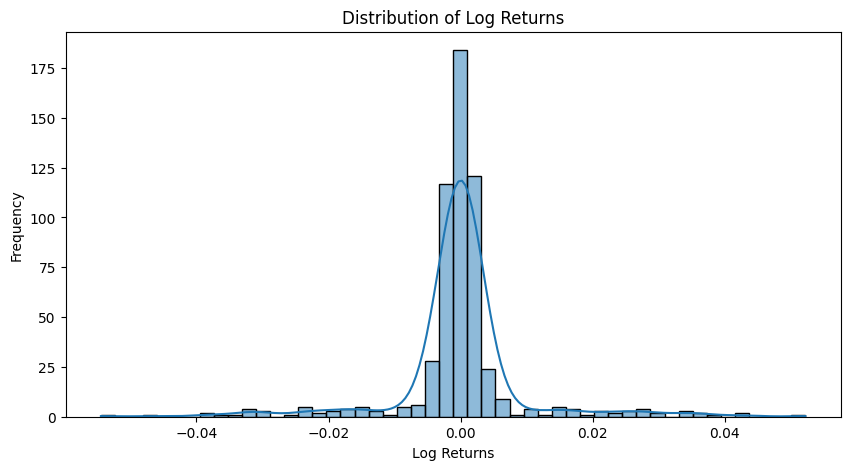

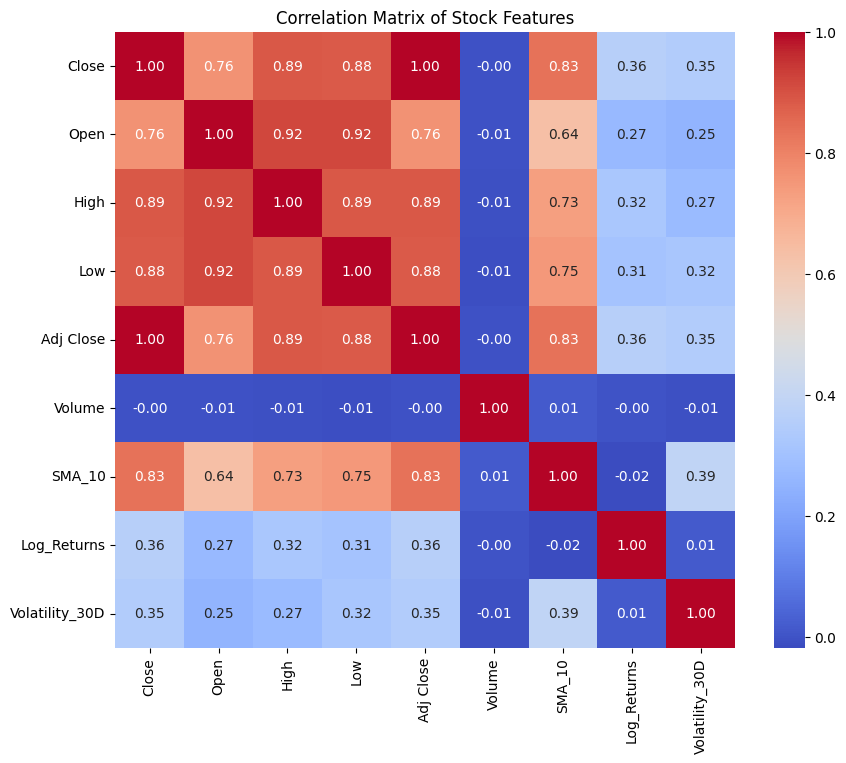


--- Credit Risk Data EDA ---

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   MonthlyIncome                 300 non-null    float64
 1   LoanAmount                    300 non-null    float64
 2   CreditScore                   300 non-null    float64
 3   LoanDuration_months           300 non-null    int64  
 4   PreviousDefaults              300 non-null    int64  
 5   Loan_Status                   300 non-null    object 
 6   Loan_Status_Encoded           300 non-null    int64  
 7   EmploymentType_Salaried       300 non-null    bool   
 8   EmploymentType_Self-Employed  300 non-null    bool   
dtypes: bool(2), float64(3), int64(3), object(1)
memory usage: 17.1+ KB

Descriptive Statistics:
       MonthlyIncome     LoanAmount  CreditScore  LoanDuration_months  \
count     300.000000     300.0

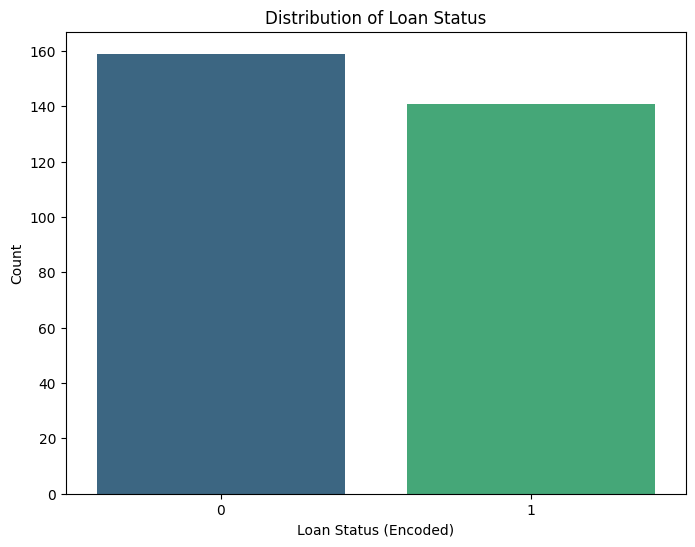

Loan Status Value Counts:
Loan_Status_Encoded
0    159
1    141
Name: count, dtype: int64


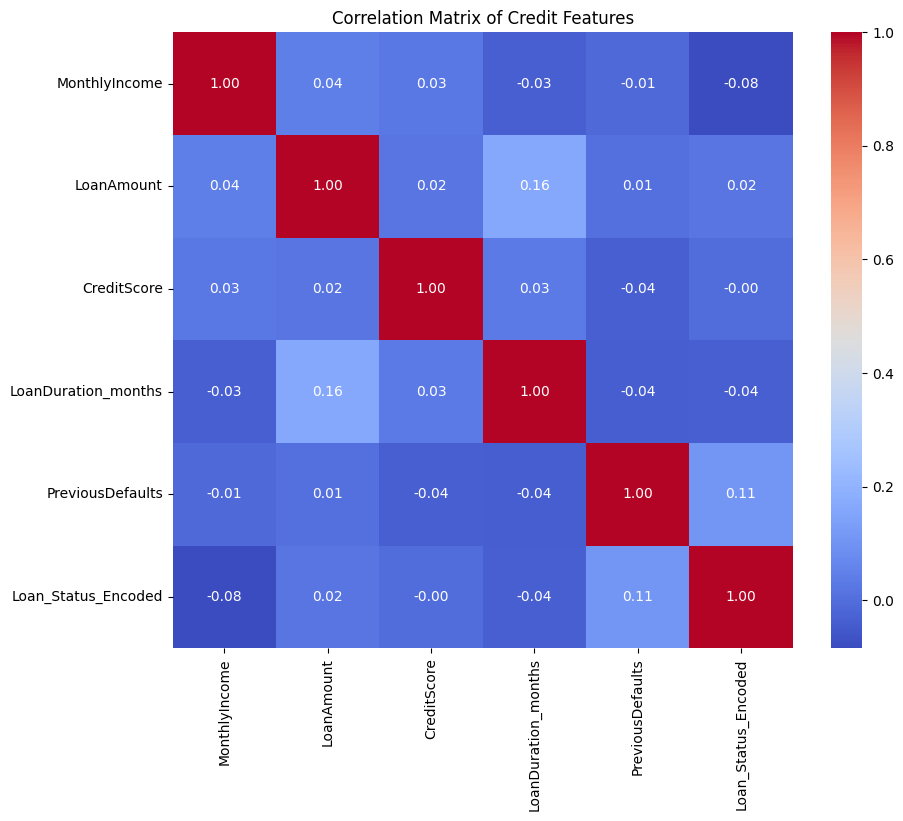


--- STEP 2: Modeling Modules ---

--- Stock Price Prediction ---

Linear Regression Stock Price Prediction:
  RMSE: 2.2936
  MAE: 1.4790
  R2 Score: 0.3682


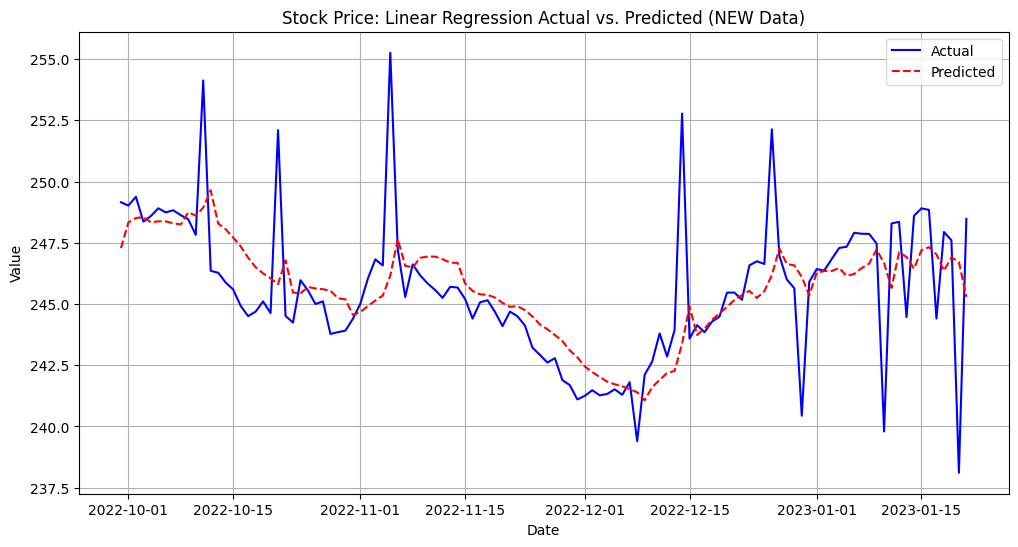


Training ARIMA model with order (5, 1, 0)...
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  456
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -925.627
Date:                Wed, 04 Jun 2025   AIC                           1863.254
Time:                        15:44:04   BIC                           1887.976
Sample:                    07-01-2021   HQIC                          1872.993
                         - 09-29-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6343      0.034    -18.814      0.000      -0.700      -0.568
ar.L2         -0.5432      0.042    -12.827      0.000      -0.626      -0.460
ar.L3 

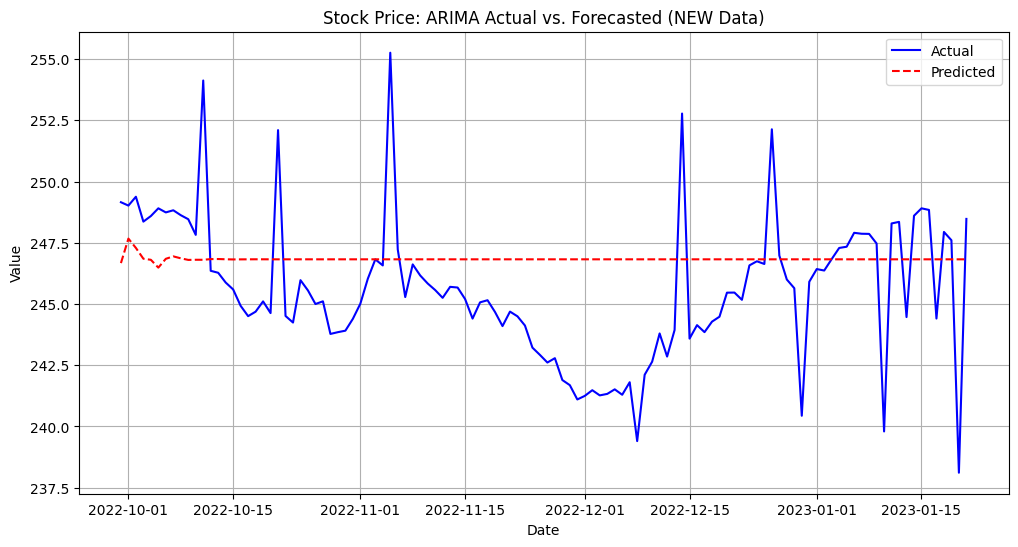

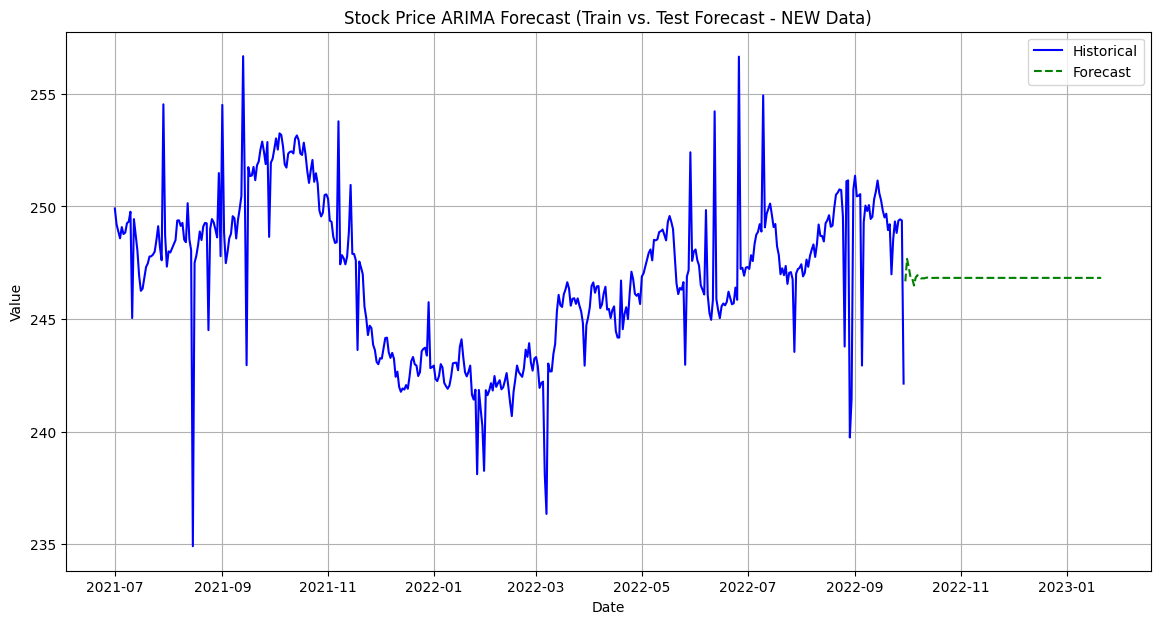


--- Credit Risk Modeling ---

Logistic Regression Credit Risk Modeling:
  Accuracy: 0.4833
  Precision: 1.0000
  Recall: 0.0606
  F1-Score: 0.1143
Confusion Matrix:
[[27  0]
 [31  2]]


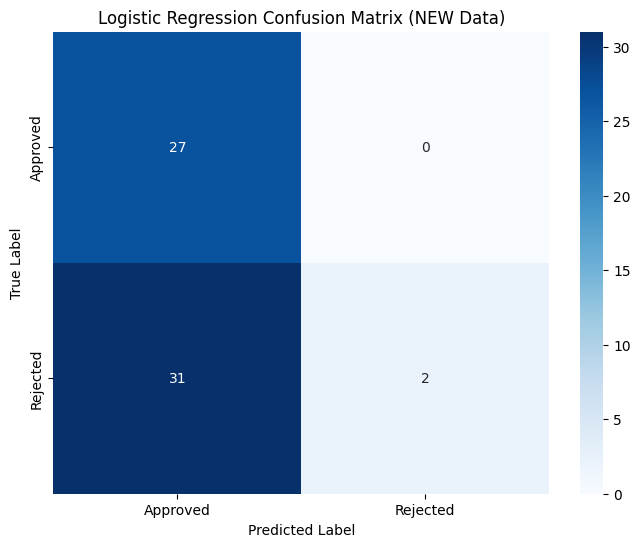


Decision Tree Credit Risk Modeling:
  Accuracy: 0.5667
  Precision: 0.6061
  Recall: 0.6061
  F1-Score: 0.6061
Confusion Matrix:
[[14 13]
 [13 20]]


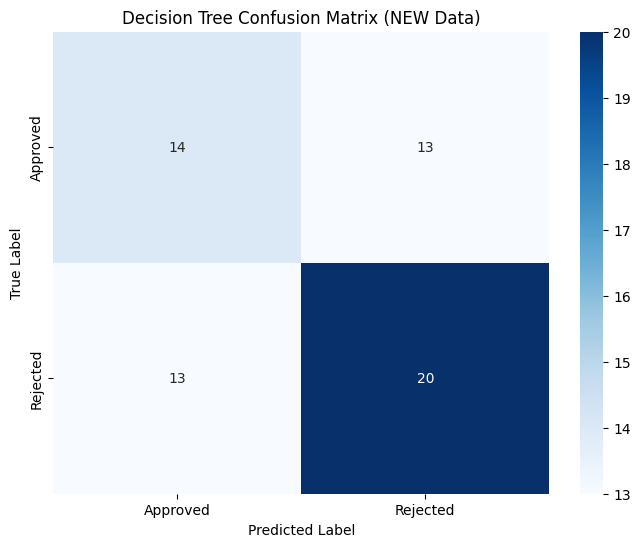


--- Revenue/Expense Forecasting ---

Training Linear Regression for Revenue forecasting...
  Linear Regression Results:
    RMSE: 5742.7087
  MAE: 5048.6137
  R2 Score: 0.5375

Training Random Forest Regressor for Revenue forecasting...
  Random Forest Regressor Results:
    RMSE: 6788.1352
  MAE: 6137.8666
  R2 Score: 0.3538

Training Gradient Boosting Regressor for Revenue forecasting...
  Gradient Boosting Regressor Results:
    RMSE: 7157.1873
  MAE: 6396.1659
  R2 Score: 0.2816


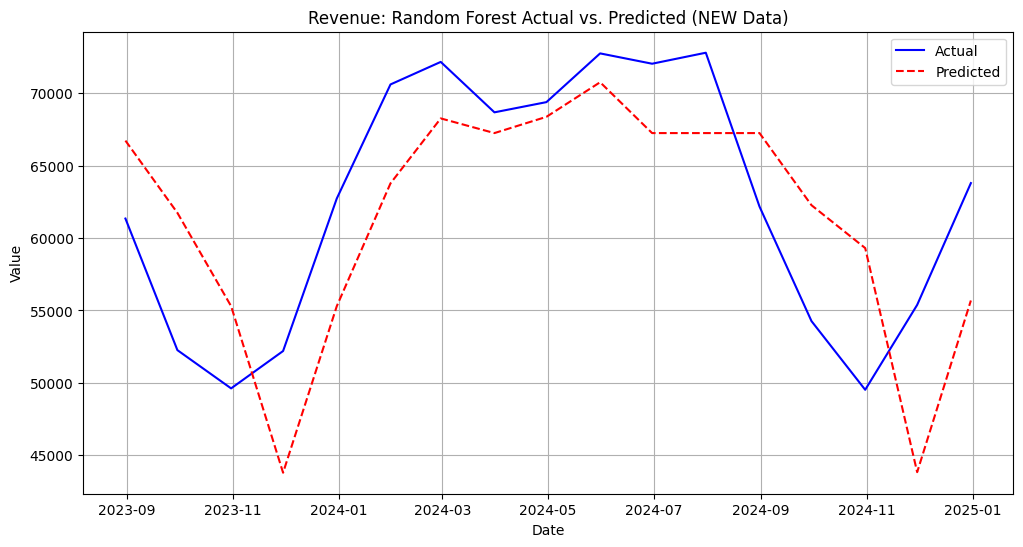


Training Linear Regression for Expense forecasting...
  Linear Regression Results:
    RMSE: 2275.9915
  MAE: 1885.4298
  R2 Score: 0.4406

Training Random Forest Regressor for Expense forecasting...
  Random Forest Regressor Results:
    RMSE: 2389.0196
  MAE: 1995.4238
  R2 Score: 0.3836

Training Gradient Boosting Regressor for Expense forecasting...
  Gradient Boosting Regressor Results:
    RMSE: 2517.6988
  MAE: 2050.8772
  R2 Score: 0.3155

Expense Forecasting Models Trained (NEW Data).

--- STEP 5: Stochastic Process & Derivatives Integration ---

Simulating 1000 stock price paths using GBM...


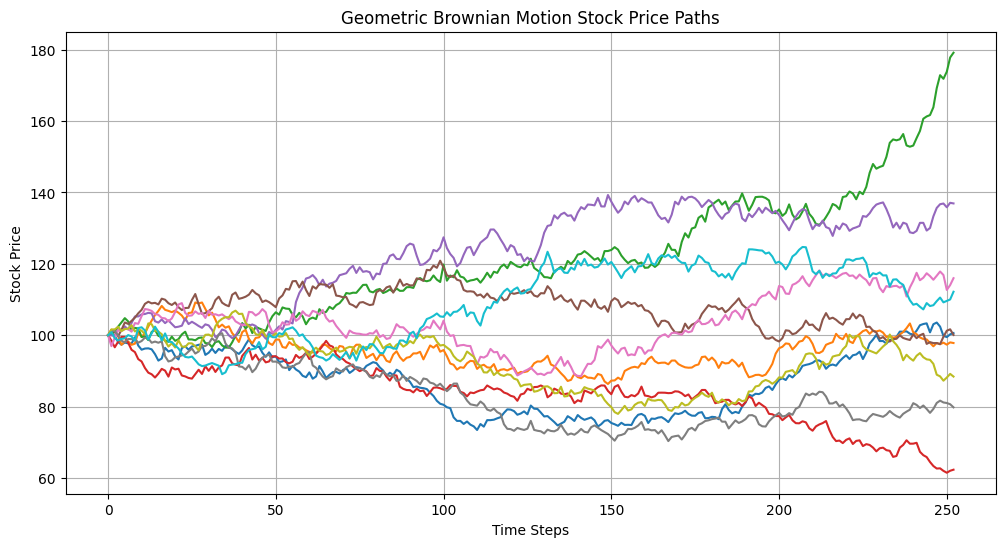


Binomial Tree (N=100) - Call Option Price: 10.8459
Binomial Tree (N=100) - Put Option Price: 8.8658

Black-Scholes - Call Option Price: 10.8706
Black-Scholes - Put Option Price: 8.8904

--- Project Execution Complete ---


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score,
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats import norm
import warnings

# Suppress harmless warnings for cleaner output during demo
warnings.filterwarnings("ignore")

# --- 1. Data Acquisition & Preparation ---

# --- MODIFIED DUMMY DATA GENERATION FUNCTIONS ---
def generate_dummy_stock_data():
    """
    Generates a DIFFERENT dummy stock price DataFrame.
    Features: downtrend, higher volatility, more price jumps.
    """
    dates = pd.to_datetime(pd.date_range(start='2021-06-01', periods=600, freq='D'))
    # Start higher, then a slight downtrend with higher fluctuations
    base_prices = 250 - np.cumsum(np.random.normal(0, 0.5, 600))
    # Add more significant random jumps
    price_jumps = np.random.normal(0, 5, 600) * (np.random.rand(600) < 0.1) # 10% chance of a jump
    close_prices = base_prices + price_jumps

    df = pd.DataFrame({'Close': close_prices}, index=dates)
    df['Open'] = df['Close'] * (1 - np.random.uniform(-0.02, 0.02, 600)) # Wider open-close diff
    df['High'] = df[['Open', 'Close']].max(axis=1) * (1 + np.random.uniform(0, 0.01, 600))
    df['Low'] = df[['Open', 'Close']].min(axis=1) * (1 - np.random.uniform(0, 0.01, 600))
    df['Adj Close'] = df['Close']
    df['Volume'] = np.random.randint(2000000, 8000000, 600) # Higher volume
    print("Generated NEW dummy stock data (downtrend, higher volatility).")
    return df

def generate_dummy_credit_data():
    """
    Generates a DIFFERENT dummy credit risk DataFrame.
    Features: more balanced default rate, new categorical features, higher income range.
    """
    num_samples = 300
    data = {
        'MonthlyIncome': np.random.randint(40000, 150000, num_samples), # Higher income
        'LoanAmount': np.random.randint(150000, 500000, num_samples), # Higher loan amounts
        'CreditScore': np.random.randint(300, 850, num_samples), # New feature
        'EmploymentType': np.random.choice(['Salaried', 'Self-Employed', 'Business'], num_samples, p=[0.5, 0.3, 0.2]), # New categorical
        'LoanDuration_months': np.random.randint(12, 60, num_samples),
        'PreviousDefaults': np.random.choice([0, 1, 2], num_samples, p=[0.7, 0.2, 0.1]), # More diverse default history
        'Loan_Status': np.random.choice(['Approved', 'Rejected'], num_samples, p=[0.55, 0.45]) # More balanced outcome
    }
    df = pd.DataFrame(data)
    # Introduce some missing values for testing preprocessing
    df.loc[df.sample(frac=0.07).index, 'LoanAmount'] = np.nan
    df.loc[df.sample(frac=0.04).index, 'MonthlyIncome'] = np.nan
    df.loc[df.sample(frac=0.02).index, 'CreditScore'] = np.nan
    print("Generated NEW dummy credit data (more features, balanced outcomes).")
    return df

def generate_dummy_revenue_expense_data():
    """
    Generates a DIFFERENT dummy revenue/expense DataFrame.
    Features: Strong seasonality, faster growth, different magnitude.
    """
    dates = pd.to_datetime(pd.date_range(start='2018-01-01', periods=84, freq='M')) # 7 years of monthly data
    t = np.arange(len(dates))

    # Base growth trend
    base_revenue = 50000 + 200 * t
    base_expense = 30000 + 100 * t

    # Strong seasonality (e.g., quarterly peaks)
    seasonal_revenue = 10000 * np.sin(t * 2 * np.pi / 12) + 5000 * np.cos(t * 2 * np.pi / 6)
    seasonal_expense = 4000 * np.sin(t * 2 * np.pi / 12) + 2000 * np.cos(t * 2 * np.pi / 6)

    # Noise
    noise_revenue = np.random.normal(0, 1500, len(dates))
    noise_expense = np.random.normal(0, 800, len(dates))

    revenue = base_revenue + seasonal_revenue + noise_revenue
    expense = base_expense + seasonal_expense + noise_expense

    # Ensure no negative values (for realism)
    revenue[revenue < 0] = 0
    expense[expense < 0] = 0

    df = pd.DataFrame({'Revenue': revenue, 'Expense': expense}, index=dates)
    print("Generated NEW dummy revenue/expense data (strong seasonality, faster growth).")
    return df

# --- Preprocessing Functions (unchanged, now expecting a DataFrame directly) ---
def preprocess_stock_data(df):
    if df is None or df.empty:
        print("Empty DataFrame for stock preprocessing.")
        return None
    df_copy = df.copy()
    df_copy.fillna(method='ffill', inplace=True)
    df_copy.fillna(method='bfill', inplace=True)
    df_copy['SMA_10'] = df_copy['Close'].rolling(window=10).mean()
    df_copy['Log_Returns'] = np.log(df_copy['Close'] / df_copy['Close'].shift(1))
    df_copy['Volatility_30D'] = df_copy['Log_Returns'].rolling(window=30).std() * np.sqrt(252)
    df_copy.dropna(inplace=True)
    print("Stock data preprocessing complete.")
    return df_copy

def preprocess_credit_data(df, target_column='Loan_Status'):
    if df is None or df.empty:
        print("Empty DataFrame for credit preprocessing.")
        return None
    df_copy = df.copy()
    if target_column not in df_copy.columns:
        print(f"Error: Target column '{target_column}' not found in credit data during preprocessing.")
        return None
    for column in df_copy.columns:
        if df_copy[column].dtype == 'object':
            df_copy[column].fillna(df_copy[column].mode()[0], inplace=True)
        else:
            df_copy[column].fillna(df_copy[column].median(), inplace=True)
    le = LabelEncoder()
    df_copy[f'{target_column}_Encoded'] = le.fit_transform(df_copy[target_column])
    print(f"Encoded '{target_column}' categories: {le.classes_}")
    categorical_cols = df_copy.select_dtypes(include=['object']).columns.tolist()
    if target_column in categorical_cols:
        categorical_cols.remove(target_column)
    if categorical_cols:
        df_copy = pd.get_dummies(df_copy, columns=categorical_cols, drop_first=True)
    df_copy.dropna(inplace=True)
    print("Credit data preprocessing complete.")
    return df_copy

def preprocess_revenue_expense_data(df):
    if df is None or df.empty:
        print("Empty DataFrame for revenue/expense preprocessing.")
        return None
    df_copy = df.copy()
    if 'Revenue' not in df_copy.columns and 'Expense' not in df_copy.columns:
        print("Error: Neither 'Revenue' nor 'Expense' column found in data for preprocessing.")
        return None
    df_copy.fillna(method='ffill', inplace=True)
    df_copy.fillna(method='bfill', inplace=True)
    df_copy.dropna(inplace=True)
    print("Revenue/Expense data preprocessing complete.")
    return df_copy

# --- 2. Modeling Modules (UNCHANGED) ---
def train_linear_regression_stock(df):
    if df is None or df.empty: return None, None
    df_copy = df.copy()
    df_copy['Prev_Close'] = df_copy['Close'].shift(1)
    features = ['Prev_Close', 'SMA_10']
    target = 'Close'
    df_copy.dropna(subset=features + [target], inplace=True)
    if df_copy.empty: return None, None
    X, y = df_copy[features], df_copy[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"\nLinear Regression Stock Price Prediction:\n  RMSE: {rmse:.4f}\n  MAE: {mae:.4f}\n  R2 Score: {r2:.4f}")
    results_df = pd.DataFrame({'Actual': y_test, 'Predicted_LR': predictions}, index=y_test.index)
    return model, results_df

def train_arima_stock(df, order=(5,1,0)):
    if df is None or df.empty or 'Close' not in df.columns: return None, None
    series = df['Close']
    train_size = int(len(series) * 0.8)
    train, test = series[0:train_size], series[train_size:]
    print(f"\nTraining ARIMA model with order {order}...")
    try:
        model = ARIMA(train, order=order)
        model_fit = model.fit()
        print(model_fit.summary())
        forecast_steps = len(test)
        forecast = model_fit.predict(start=len(train), end=len(train) + forecast_steps - 1, dynamic=False)
        forecast.index = test.index
        rmse = np.sqrt(mean_squared_error(test, forecast))
        mae = mean_absolute_error(test, forecast)
        r2 = r2_score(test, forecast)
        print(f"\nARIMA Stock Price Forecasting:\n  RMSE: {rmse:.4f}\n  MAE: {mae:.4f}\n  R2 Score: {r2:.4f}")
        results_df = pd.DataFrame({'Actual': test, 'Predicted_ARIMA': forecast}, index=test.index)
        return model_fit, results_df
    except Exception as e:
        print(f"Error training ARIMA model: {e}")
        return None, None

def train_logistic_regression_credit(df, target_col_encoded='Loan_Status_Encoded'):
    if df is None or df.empty or target_col_encoded not in df.columns: return None, None
    features = [col for col in df.columns if col != target_col_encoded and not col.startswith('Loan_Status')]
    X, y = df[features], df[target_col_encoded]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LogisticRegression(solver='liblinear', random_state=42)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    probabilities = model.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    cm = confusion_matrix(y_test, predictions)
    print(f"\nLogistic Regression Credit Risk Modeling:\n  Accuracy: {accuracy:.4f}\n  Precision: {precision:.4f}\n  Recall: {recall:.4f}\n  F1-Score: {f1:.4f}\nConfusion Matrix:\n{cm}")
    results_df = pd.DataFrame({'Actual': y_test, 'Predicted_LR': predictions, 'Prob_Default': probabilities}, index=y_test.index)
    return model, results_df

def train_decision_tree_credit(df, target_col_encoded='Loan_Status_Encoded'):
    if df is None or df.empty or target_col_encoded not in df.columns: return None, None
    features = [col for col in df.columns if col != target_col_encoded and not col.startswith('Loan_Status')]
    X, y = df[features], df[target_col_encoded]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    probabilities = model.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    cm = confusion_matrix(y_test, predictions)
    print(f"\nDecision Tree Credit Risk Modeling:\n  Accuracy: {accuracy:.4f}\n  Precision: {precision:.4f}\n  Recall: {recall:.4f}\n  F1-Score: {f1:.4f}\nConfusion Matrix:\n{cm}")
    results_df = pd.DataFrame({'Actual': y_test, 'Predicted_DT': predictions, 'Prob_Default': probabilities}, index=y_test.index)
    return model, results_df

def train_regression_revenue_expense(df, target_col, features=None):
    if df is None or df.empty or target_col not in df.columns: return None
    df_copy = df.copy()
    if features is None:
        df_copy['Prev_Target'] = df_copy[target_col].shift(1)
        features = ['Prev_Target']
        df_copy.dropna(subset=features + [target_col], inplace=True)
        if df_copy.empty: return None
    X, y = df_copy[features], df_copy[target_col]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    models = {
        "Linear Regression": LinearRegression(),
        "Random Forest Regressor": RandomForestRegressor(random_state=42),
        "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42)
    }
    results = {}
    for name, model in models.items():
        print(f"\nTraining {name} for {target_col} forecasting...")
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, predictions))
        mae = mean_absolute_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)
        print(f"  {name} Results:\n    RMSE: {rmse:.4f}\n  MAE: {mae:.4f}\n  R2 Score: {r2:.4f}")
        results[name] = {'model': model, 'predictions': predictions, 'actual': y_test, 'metrics': {'rmse': rmse, 'mae': mae, 'r2': r2}}
    return results

# --- 4. Visualize Results (UNCHANGED) ---
def plot_actual_vs_predicted(actual, predicted, title="Actual vs. Predicted"):
    plt.figure(figsize=(12, 6))
    plt.plot(actual.index, actual, label='Actual', color='blue')
    plt.plot(predicted.index, predicted, label='Predicted', color='red', linestyle='--')
    plt.title(title)
    plt.xlabel("Date" if isinstance(actual.index, pd.DatetimeIndex) else "Index")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_forecasting_curve(historical_data, forecast_data, title="Forecast Curve"):
    plt.figure(figsize=(14, 7))
    plt.plot(historical_data.index, historical_data, label='Historical', color='blue')
    plt.plot(forecast_data.index, forecast_data, label='Forecast', color='green', linestyle='--')
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_confusion_matrix(cm, classes, title='Confusion Matrix'):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# --- 5. Stochastic Process & Derivatives Integration (Optional Advanced Add-on) (UNCHANGED) ---
def geometric_brownian_motion(S0, mu, sigma, T, dt, num_simulations):
    num_steps = int(T / dt)
    price_paths = np.zeros((num_steps + 1, num_simulations))
    price_paths[0] = S0
    for t in range(1, num_steps + 1):
        dW = np.random.normal(0, np.sqrt(dt), num_simulations)
        price_paths[t] = price_paths[t-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * dW)
    return price_paths

def binomial_tree_option_pricing(S0, K, T, r, sigma, N, option_type='call'):
    dt = T / N
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)
    stock_prices = np.zeros((N + 1, N + 1))
    option_values = np.zeros((N + 1, N + 1))
    for j in range(N + 1):
        stock_prices[N, j] = S0 * (u**j) * (d**(N - j))
        if option_type == 'call': option_values[N, j] = max(0, stock_prices[N, j] - K)
        else: option_values[N, j] = max(0, K - stock_prices[N, j])
    for i in range(N - 1, -1, -1):
        for j in range(i + 1):
            option_values[i, j] = np.exp(-r * dt) * (p * option_values[i + 1, j + 1] + (1 - p) * option_values[i + 1, j])
    return option_values[0, 0]

def black_scholes_option_pricing(S, K, T, r, sigma, option_type='call'):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    if option_type == 'call': price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    else: price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    return price

# --- 6. Exploratory Data Analysis (EDA) (UNCHANGED) ---
def perform_eda_stock(df, title="Stock Data EDA"):
    if df is None or df.empty: return
    print(f"\n--- {title} ---")
    print("\nDataFrame Info:")
    df.info()
    print("\nDescriptive Statistics:")
    print(df.describe())
    plt.figure(figsize=(14, 6))
    plt.plot(df.index, df['Close'])
    plt.title('Stock Close Price Trend')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.grid(True)
    plt.show()
    plt.figure(figsize=(10, 5))
    sns.histplot(df['Log_Returns'].dropna(), bins=50, kde=True)
    plt.title('Distribution of Log Returns')
    plt.xlabel('Log Returns')
    plt.ylabel('Frequency')
    plt.show()
    numerical_cols = df.select_dtypes(include=np.number).columns
    if not numerical_cols.empty:
        plt.figure(figsize=(10, 8))
        sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
        plt.title('Correlation Matrix of Stock Features')
        plt.show()

def perform_eda_credit(df, target_col_encoded='Loan_Status_Encoded', title="Credit Risk Data EDA"):
    if df is None or df.empty: return
    print(f"\n--- {title} ---")
    print("\nDataFrame Info:")
    df.info()
    print("\nDescriptive Statistics:")
    print(df.describe())
    if target_col_encoded in df.columns:
        plt.figure(figsize=(8, 6))
        sns.countplot(x=target_col_encoded, data=df, palette='viridis')
        plt.title('Distribution of Loan Status')
        plt.xlabel('Loan Status (Encoded)')
        plt.ylabel('Count')
        plt.show()
        print(f"Loan Status Value Counts:\n{df[target_col_encoded].value_counts()}")
    numerical_cols = df.select_dtypes(include=np.number).columns
    if not numerical_cols.empty:
        plt.figure(figsize=(10, 8))
        sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
        plt.title('Correlation Matrix of Credit Features')
        plt.show()

# --- Main Execution Block ---
if __name__ == "__main__":
    print("--- Running Financial Forecasting Pipeline with NEW Dummy Data ---")
    print("This run uses DIFFERENT synthetically generated data compared to the previous version.")
    print("For your project, replace dummy data generation with your actual CSV file loading.")

    # --- Data Acquisition & Preparation ---
    print("\n--- STEP 1: Data Acquisition & Preparation ---")

    # Generate and preprocess NEW dummy stock data
    dummy_stock_raw_df = generate_dummy_stock_data()
    stock_df = preprocess_stock_data(dummy_stock_raw_df)

    # Generate and preprocess NEW dummy credit data
    dummy_credit_raw_df = generate_dummy_credit_data()
    credit_df = preprocess_credit_data(dummy_credit_raw_df, target_column='Loan_Status') # Ensure correct target column for the new dummy data

    # Generate and preprocess NEW dummy revenue/expense data
    dummy_revenue_expense_raw_df = generate_dummy_revenue_expense_data()
    revenue_expense_df = preprocess_revenue_expense_data(dummy_revenue_expense_raw_df)

    # --- 6. Exploratory Data Analysis (EDA) ---
    print("\n--- STEP 6: Exploratory Data Analysis (EDA) ---")
    if stock_df is not None:
        perform_eda_stock(stock_df.copy())
    if credit_df is not None:
        perform_eda_credit(credit_df.copy(), target_col_encoded='Loan_Status_Encoded')
    # You can add EDA for revenue_expense_df as well, similar to stock data time series.

    # --- 2. Modeling Modules ---
    print("\n--- STEP 2: Modeling Modules ---")

    # Stock Price Prediction
    if stock_df is not None:
        print("\n--- Stock Price Prediction ---")
        lr_stock_model, lr_stock_results = train_linear_regression_stock(stock_df.copy())
        if lr_stock_results is not None:
            plot_actual_vs_predicted(lr_stock_results['Actual'], lr_stock_results['Predicted_LR'],
                                     title="Stock Price: Linear Regression Actual vs. Predicted (NEW Data)")

        arima_stock_model, arima_stock_results = train_arima_stock(stock_df.copy(), order=(5,1,0))
        if arima_stock_results is not None:
            plot_actual_vs_predicted(arima_stock_results['Actual'], arima_stock_results['Predicted_ARIMA'],
                                     title="Stock Price: ARIMA Actual vs. Forecasted (NEW Data)")
            if arima_stock_model and 'Close' in stock_df.columns:
                series_full = stock_df['Close']
                train_size = int(len(series_full) * 0.8)
                train_series = series_full[0:train_size]
                plot_forecasting_curve(train_series, arima_stock_results['Predicted_ARIMA'],
                                       title="Stock Price ARIMA Forecast (Train vs. Test Forecast - NEW Data)")

    # Credit Risk Modeling
    if credit_df is not None:
        print("\n--- Credit Risk Modeling ---")
        lr_credit_model, lr_credit_results = train_logistic_regression_credit(credit_df.copy(), target_col_encoded='Loan_Status_Encoded')
        if lr_credit_results is not None:
            cm_lr = confusion_matrix(lr_credit_results['Actual'], lr_credit_results['Predicted_LR'])
            plot_confusion_matrix(cm_lr, classes=['Approved', 'Rejected'], title='Logistic Regression Confusion Matrix (NEW Data)') # Updated classes for new dummy data

        dt_credit_model, dt_credit_results = train_decision_tree_credit(credit_df.copy(), target_col_encoded='Loan_Status_Encoded')
        if dt_credit_results is not None:
            cm_dt = confusion_matrix(dt_credit_results['Actual'], dt_credit_results['Predicted_DT'])
            plot_confusion_matrix(cm_dt, classes=['Approved', 'Rejected'], title='Decision Tree Confusion Matrix (NEW Data)') # Updated classes for new dummy data

    # Revenue/Expense Forecasting
    if revenue_expense_df is not None:
        print("\n--- Revenue/Expense Forecasting ---")
        if 'Revenue' in revenue_expense_df.columns:
            revenue_forecast_results = train_regression_revenue_expense(revenue_expense_df.copy(), target_col='Revenue')
            if revenue_forecast_results:
                if "Random Forest Regressor" in revenue_forecast_results:
                    rf_results = revenue_forecast_results["Random Forest Regressor"]
                    actual_series = pd.Series(rf_results['actual'], index=rf_results['actual'].index)
                    predicted_series = pd.Series(rf_results['predictions'], index=rf_results['actual'].index)
                    plot_actual_vs_predicted(actual_series, predicted_series,
                                             title="Revenue: Random Forest Actual vs. Predicted (NEW Data)")

        if 'Expense' in revenue_expense_df.columns:
            expense_forecast_results = train_regression_revenue_expense(revenue_expense_df.copy(), target_col='Expense')
            if expense_forecast_results:
                print("\nExpense Forecasting Models Trained (NEW Data).")

    # --- 5. Stochastic Process & Derivatives Integration (Optional Advanced Add-on) (UNCHANGED) ---
    print("\n--- STEP 5: Stochastic Process & Derivatives Integration ---")
    S0 = 100
    mu = 0.05
    sigma = 0.2
    T = 1
    dt = 1/252
    num_simulations = 1000

    print(f"\nSimulating {num_simulations} stock price paths using GBM...")
    gbm_paths = geometric_brownian_motion(S0, mu, sigma, T, dt, num_simulations)

    plt.figure(figsize=(12, 6))
    plt.plot(gbm_paths[:, :10])
    plt.title('Geometric Brownian Motion Stock Price Paths')
    plt.xlabel('Time Steps')
    plt.ylabel('Stock Price')
    plt.grid(True)
    plt.show()

    S_opt = 100
    K_opt = 100
    T_opt = 1
    r_opt = 0.02
    sigma_opt = 0.25

    N_steps_binomial = 100
    call_price_bt = binomial_tree_option_pricing(S_opt, K_opt, T_opt, r_opt, sigma_opt, N_steps_binomial, option_type='call')
    put_price_bt = binomial_tree_option_pricing(S_opt, K_opt, T_opt, r_opt, sigma_opt, N_steps_binomial, option_type='put')
    print(f"\nBinomial Tree (N={N_steps_binomial}) - Call Option Price: {call_price_bt:.4f}")
    print(f"Binomial Tree (N={N_steps_binomial}) - Put Option Price: {put_price_bt:.4f}")

    call_price_bs = black_scholes_option_pricing(S_opt, K_opt, T_opt, r_opt, sigma_opt, option_type='call')
    put_price_bs = black_scholes_option_pricing(S_opt, K_opt, T_opt, r_opt, sigma_opt, option_type='put')
    print(f"\nBlack-Scholes - Call Option Price: {call_price_bs:.4f}")
    print(f"Black-Scholes - Put Option Price: {put_price_bs:.4f}")

    print("\n--- Project Execution Complete ---")